# 모델 성능 평가지표
> 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정하는 방법

# 회귀 모형 성능 측정

## LInear Regression 학습 및 예측

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

data = diabetes.data
target = diabetes.target
data.shape, target.shape


((442, 10), (442,))

In [4]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

In [8]:
from sklearn.linear_model import LinearRegression

# 모델 생성 
model = LinearRegression()

# 모델 학습 
model.fit(x_train, y_train)

# 모델 예측 
pred = model.predict(x_valid)

In [9]:
# 예측값과 정답 크기 비교 
pred.shape, y_valid.shape

((111,), (111,))

## 회귀 평가 지표 

### R2 결정계수
> 회귀식이 얼마나 정확한지를 나타내는 것   

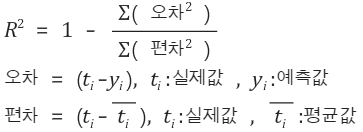

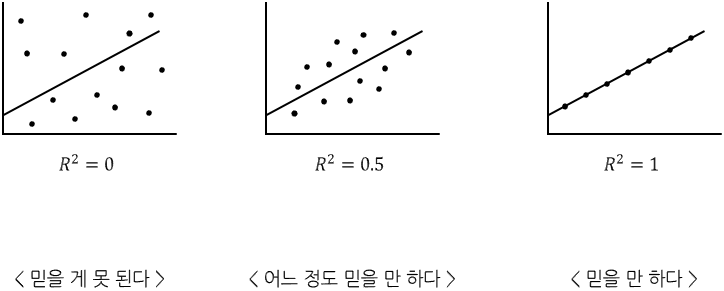

In [10]:
from sklearn.metrics import r2_score

# r2 스코어로 미루어 보아 학습이 덜 되었음을 알 수 있다. 
r2 = r2_score(y_valid, pred)
r2

0.48490866359057994

### MSE (Mean Squared Error)

> 실제값과 예측값의 차이를 제곱한뒤 평균화     
> 이상치에 민감하다.

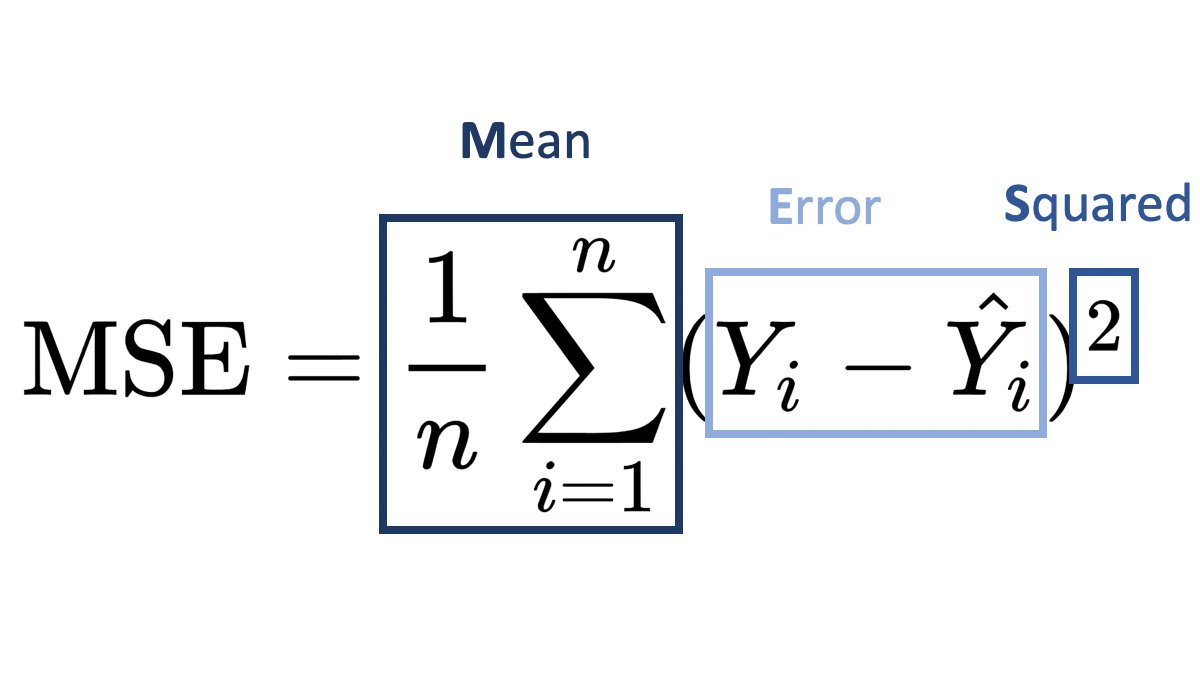



In [11]:
from sklearn.metrics import mean_squared_error
mse =mean_squared_error(y_valid, pred)
mse

2848.2953079329445

### RMSE(Root Mean Squared Error)
> MSE에 루트를 씌운 값      
> 제곱을 했기 때문에 마찬가지로 이상치에 민감


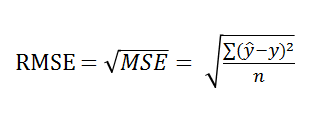

In [12]:
import numpy as np
np.sqrt(mse)

53.36942296795932

### MAE(Mean Absolute Error)
> 실제값과 예측값의 차이를 절대값으로 변환해서 평균화     
> 절대값을 이용하기 때문에 이상치에 덜 민감하다.        


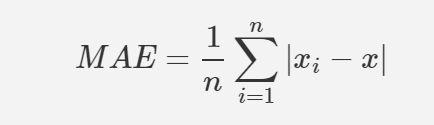

In [14]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_valid, pred)
mae

41.548363283252066

### MAPE(Mean Absolute Percentage Error)
> 실제값에 대한 절대오차 비율의 평균을 퍼센트로 표현    
> MSE, RMSE의 단점을 보완           
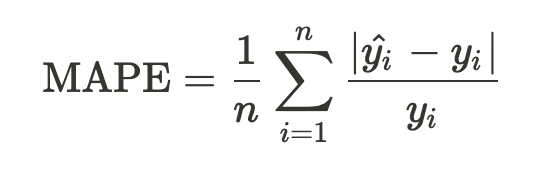

In [15]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid, pred)

0.3731095161631557

### SMAPE(Symmetric Mean Absolute Percentage Error)
> 기본 MAPE의 단점 보완     
> MAPE와 다른 점은 각 실제값과 예측값을 절대값으로 변경 후 합으로 나눈다.     
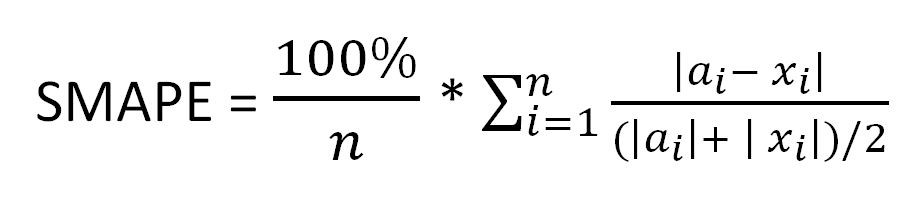

In [16]:
def smape(true, pred) :
  error = np.abs(true-pred) / (np.abs(true) + np.abs(pred))
  return np.mean(error)

smape(y_valid, pred)

0.15271360402048711

## 분류 모형 성능 평가

### 혼동행렬 (Confusion Matrix)
>  분석 모델에서 구한 분류의 예측 범주와 데이터의 실제 분류 범주를 교차 표 형태로 정리한 행렬

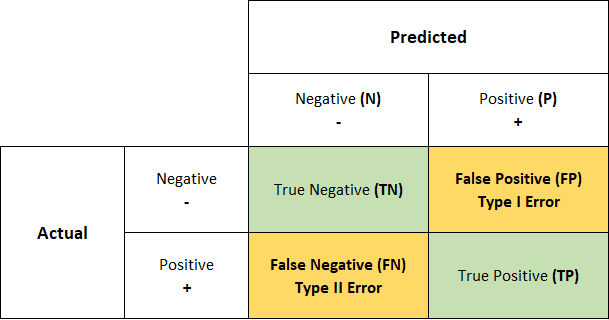

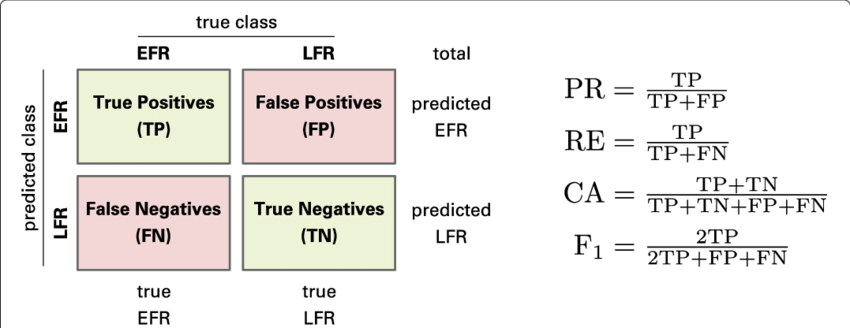

#### 예제

In [17]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
data = digits.data

# dataset의 가장 첫번째 data를 받아온다. 
digit = data[0]

# Binary Classifier(이진분류), 타겟 데이터가 5일때 true, 아닐 때 false 
target = (digits.target == 5).astype(int)

In [34]:
# 원본 데이터 
digit = data[5]
digit.shape, digits.target[5]

((64,), 5)

In [30]:
# target 값이 5일 때에만 True(1)을 출력하도록 데이터를 조작 
target[5]

1

In [26]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

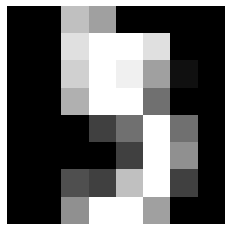

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 벡터 변환 
digit_img = digit.reshape(8 ,8 )

plt.imshow(digit_img, cmap='gray')
plt.axis('off')
plt.show()

In [36]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

# 1이 출력되어야 하는데 0이 출력되었으므로 학습이 덜 되었다. 
sgd_clf.predict([digit])

array([0])

In [37]:
# 교차검증 - 여러 번 학습 
from sklearn.model_selection import cross_val_predict

# cv는 학습할 횟수를 의미 
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=5 )

In [38]:
# 혼동행렬로 표현 
from sklearn.metrics import confusion_matrix

# 학습을 5번 한 모델의 예측 데이터 결과 
confusion_matrix(y_train, y_train_pred)

array([[1217,    7],
       [   8,  115]])

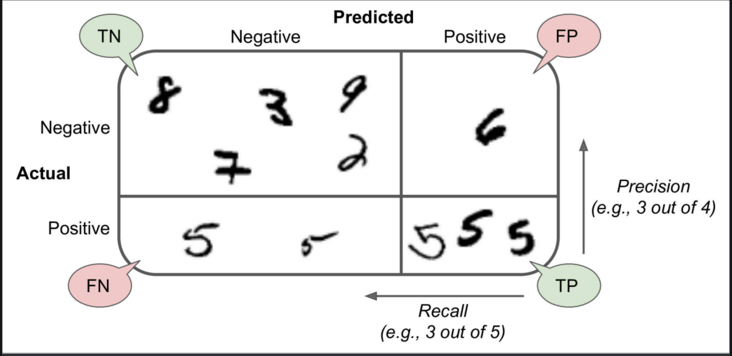

#### 모델 예측

##### Dummy 예측
> 실제 학습한 것이 아니며, 가장 많은 것을 return하는 랜덤값 

In [39]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(x_train, y_train)
pred_dummy = dummy.predict(x_valid)

##### 모델 예측

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

pred_clf =sgd_clf.predict(x_valid)

#### Accuracy(정확도)
> 정확도는 올바른 총 예측 수의 비율이다.  
> FN, FP 중 더 줄일 필요가 있는 오류가 있을 경우 취약하다.

$$
Accuracy = { TP + TN \over TP + FN + FP + TN }
$$

In [45]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_valid, pred_dummy)
print(f'dummy : {score}')

score = accuracy_score(y_valid, pred_clf)
print(f'model: {score}')

dummy : 0.8688888888888889
model: 0.9866666666666667


#### Precision(정밀도)
> 정밀도는 올바르게 분류된 긍정적인 예의 총 수와 예측된 긍정적인 예의 총 수의 비율이다. 긍정적인 예측에서 얻은 정확성을 보여준다.  
> FP 줄이는 것이 목표일 때 사용  
  
$$
Precision = { TP \over TP + FP }
$$

In [47]:
from sklearn.metrics import precision_score
score = precision_score(y_valid, pred_dummy)
print(f'dummy: {score}')

score = precision_score(y_valid, pred_clf)
print(f'model : {score}')

dummy: 0.0
model : 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Sensitivity(민감도) = Recall(재현도) = TPR
> - 민감도는 TPR(True Positivie Rate) 또는 Recall이라고도 한다.  
> - 분류기에 의해 양성으로 분류된 양성 사례의 척도이다.
> - FN 줄이는 것이 목표일 때 사용  
  
$$
Recall = { TP \over TP + FN }
$$

In [48]:
from sklearn.metrics import recall_score
score = recall_score(y_valid, pred_dummy)
print(f'dummy : {score}')

score = recall_score(y_valid, pred_clf)
print(f'model_ {score}')

dummy : 0.0
model_ 0.8983050847457628


#### F1 Score
> F1 Score는 분류 모델에서 사용되는 머신러닝 Metric입니다.  
> Precision(정밀도)과 Recall(재현도)으로 F1 Score가 구성되고 불균형한 데이터가 잘 동작하는지에 대한 평가지표가 됩니다.      
> 가장 많이 사용함
  
$$
F1-Score = { 2 * Presicion * Recall \over Precision + Recall }
$$   

In [49]:
from sklearn.metrics import f1_score
score = f1_score(y_valid, pred_dummy)
print(f'score : {score}')

score = f1_score(y_valid, pred_clf)
print(f'score : {score}')

score : 0.0
score : 0.9464285714285715


In [50]:
# 전체 한번에 볼 수 잇는 함수 
from sklearn.metrics import classification_report

print(classification_report(y_valid, pred_dummy))
print('-' * 100)
print(classification_report(y_valid, pred_clf))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       391
           1       0.00      0.00      0.00        59

    accuracy                           0.87       450
   macro avg       0.43      0.50      0.46       450
weighted avg       0.75      0.87      0.81       450

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       391
           1       1.00      0.90      0.95        59

    accuracy                           0.99       450
   macro avg       0.99      0.95      0.97       450
weighted avg       0.99      0.99      0.99       450



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Precision-Recall Trade-off

> 재현도와 정밀도는 반비례 관계에 있다.     
> 재현도는 분모를 실제 참값인 것으로 하고, 정밀도는 분모를 예측을 참으로 한 것으로 하기 때문이다. 

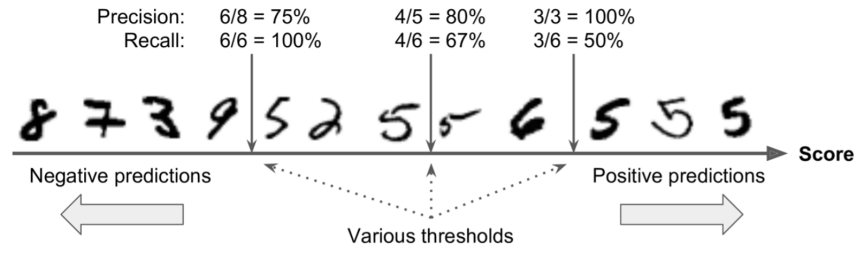

#### 임계값 (threshold)
> 모델은 분류에서 확률 또는 음수에서 양수 사이의 실수를 예측값으로 출력     
> 사이킷런에서는 predict_probe(), dicision_function() 제공 

In [57]:
pred_proba = sgd_clf.decision_function(x_valid)

In [60]:
threshold = 0 # 사이킷런의 디폴트값
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(1.0, 0.8983050847457628)

In [61]:
# 임계치 기준을 높이면 recall 값은 떨어진다. 
threshold = 30000
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid, pred), recall_score(y_valid, pred)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [62]:
# 임계치 기준을 낮추면 recall 값이 높아진다. 
threshold = -30000
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid, pred), recall_score(y_valid, pred)

(0.13111111111111112, 1.0)

##### Decision Tree Model을 이용한 계산

In [64]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 
tree = DecisionTreeClassifier (max_depth=3, random_state = SEED)

# 모델 학습 
tree.fit(x_train, y_train)

# 모델 평가 : predict = predict_proba(확률)을 이용해 threshold를 적용한 결과. return 값은 0 또는 1 
pred_tree = tree.predict(x_valid)

In [69]:
pred_tree.shape

(450,)

In [70]:
# default 값인 0.5보다 크면1로 return 
pred_tree[:3]

array([0, 0, 0])

In [65]:
# proba는 확률 값을 의미한다. 
pred_proba = tree.predict_proba(x_valid)[:, 1]

In [71]:
pred_proba[:3]

array([0.02371542, 0.01059322, 0.01059322])

In [68]:
 # 사이킷런의 디폴트 값 0.5를 기준으로 0과 1로 구분해준 결과 
threshold = 0.5
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid, pred), recall_score(y_valid, pred)

(0.9811320754716981, 0.8813559322033898)

In [73]:
threshold = 0.9
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid, pred), recall_score(y_valid, pred)

(0.9811320754716981, 0.8813559322033898)

In [75]:
threshold = 0.1
pred = np.where(pred_proba > threshold, 1, 0)
precision_score(y_valid, pred), recall_score(y_valid, pred)

(0.8813559322033898, 0.8813559322033898)

#### 혼동행렬 시각화

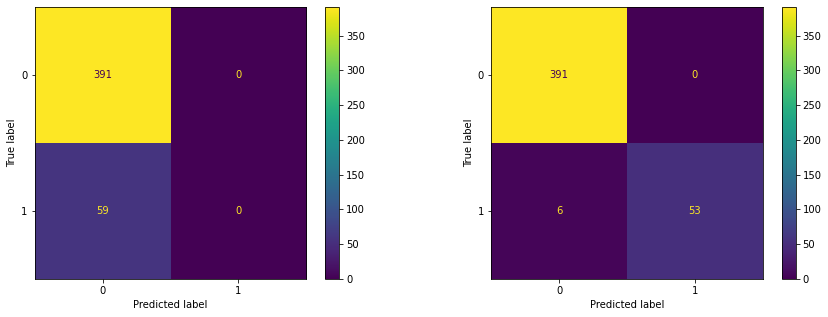

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=[15,5])

cm = confusion_matrix(y_valid, pred_dummy)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

cm = confusion_matrix(y_valid, pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[1])
plt.show()

### ROC curve
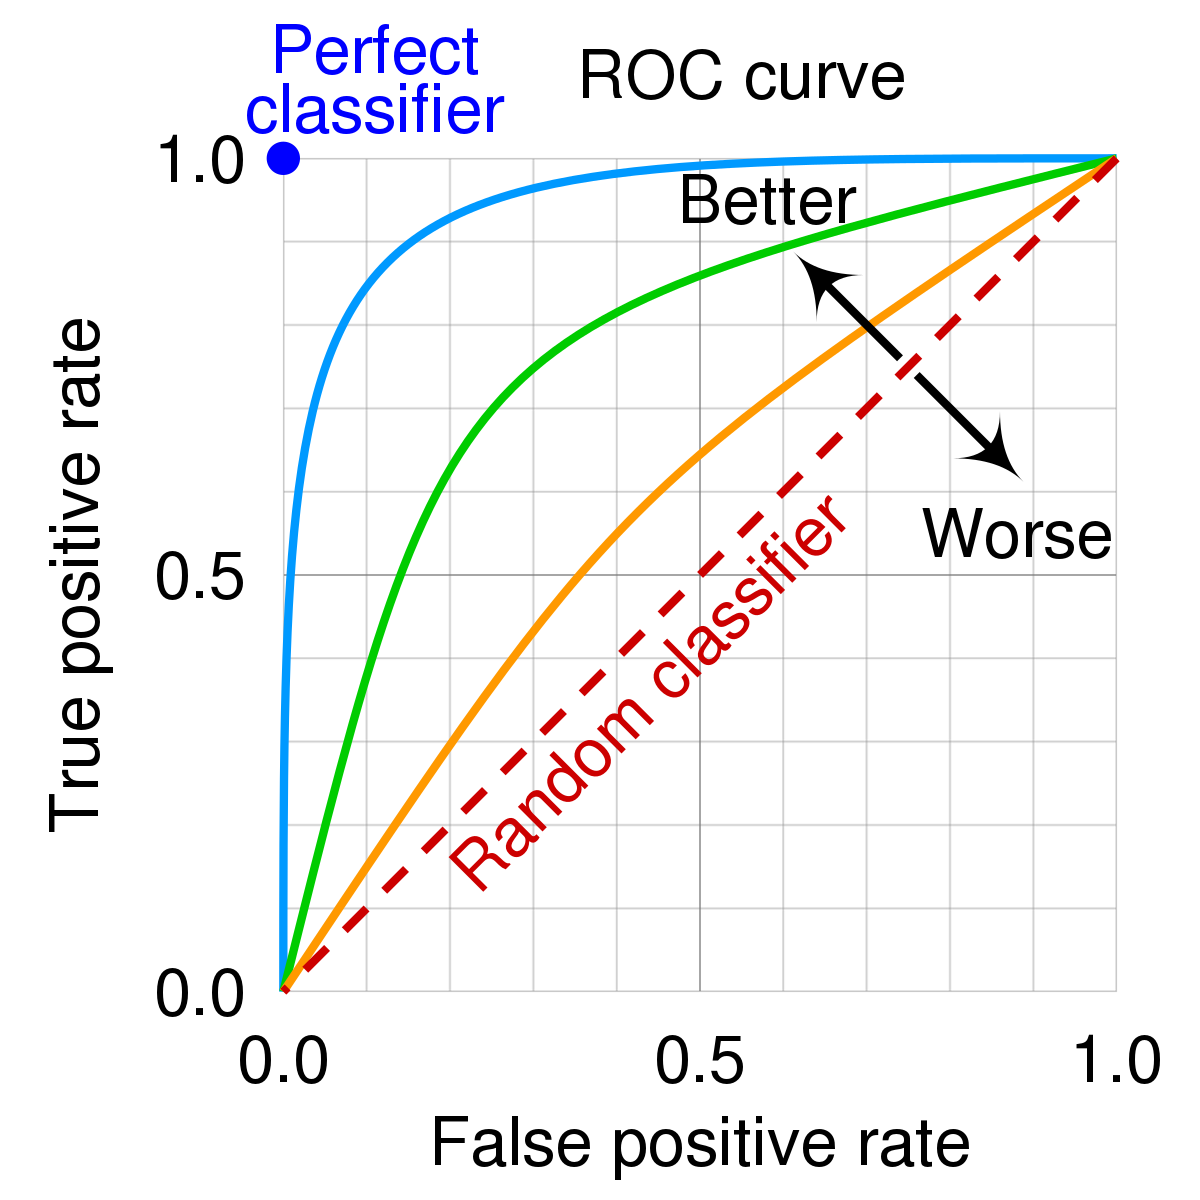

In [82]:
# 1에 대한 확률만 가지고 온다. 
pred_dummy = dummy.predict_proba(x_valid)[:, 1]
pred_tree = tree.predict_proba(x_valid)[:, 1]

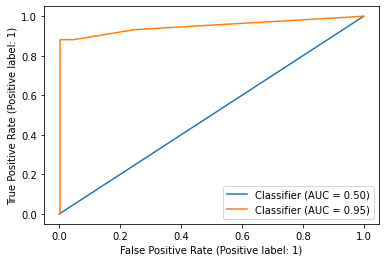

In [86]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

# dummy는 파란색 그래프로 학습이 덜 되었음을 알 수 있다. 
RocCurveDisplay.from_predictions(y_valid, pred_dummy, ax=ax)

# 주황색 그래프, 학습이 잘 되었음을 알 수 있다. 
RocCurveDisplay.from_predictions(y_valid, pred_tree, ax= ax)

plt.show()

#### AUROC (Area Under ROC curve)
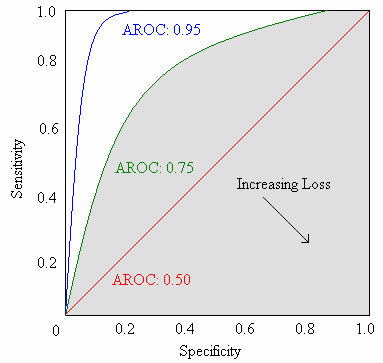
- ROC Curve의 밑부분 면적
- 넓을수록 모형 성능이 좋다.
- 임계값(threshold)이 어떻게 선택되었는지와 무관하게 모델의 예측 품질을 측정할 수 있다.
  - Poor model: 0.5 ~ 0.7
  - Fair model: 0.7 ~ 0.8
  - Good model: 0.8 ~ 0.9
  - Excellent model: 0.9 ~ 1.0

In [88]:
# 이진 분류에 좋은 평가 지표이다. curve로 해석하기 어려우므로 이를 수치로 표현한 것이 auc이다. 
from sklearn.metrics import roc_curve, auc

# 그래프 아래의 넓이가 0.5이므로 학습이 잘 되지 않았다는 것을 알 수 있다. 
fpr, tpr, thresholds = roc_curve(y_valid, pred_dummy)
print(f'dummy: {auc(fpr, tpr)}')
print('-' * 100)

#1에 가까운 것으로 보아 학습이 잘 되었다는 것을 알 수 있다. 
fpr, tpr, thresholds = roc_curve(y_valid, pred_tree)
print(f'model : {auc(fpr, tpr)}')

dummy: 0.5
----------------------------------------------------------------------------------------------------
model : 0.9479604664268065


### Multi Classification

> 여러가지 결과를 식별할 수 있는 모델

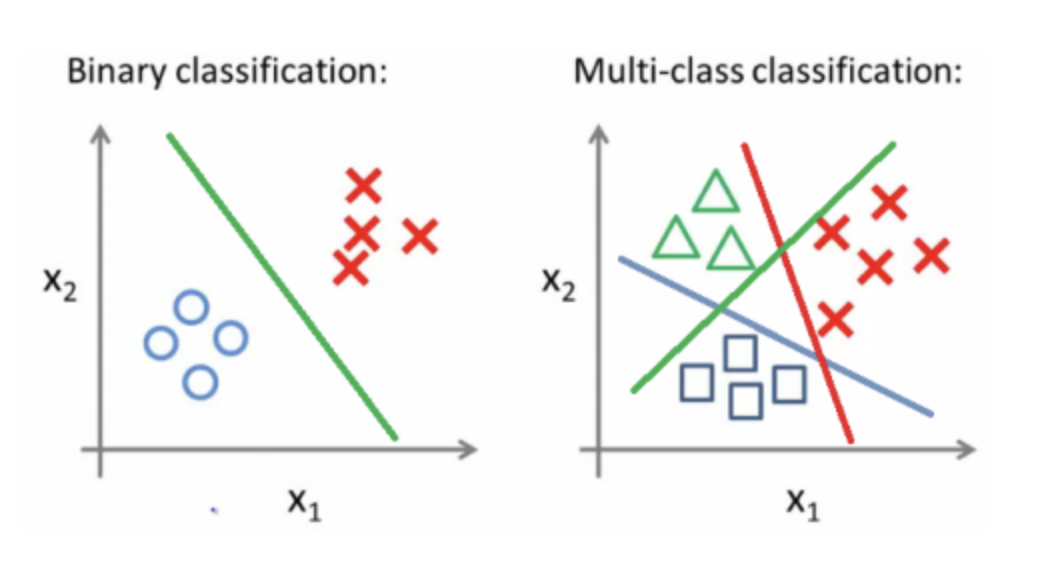

#### 예제

In [90]:
digits = load_digits()

data = digits.data
target = digits.target

x_train, x_valid, y_train, y_valid = train_test_split(data,target, random_state=SEED)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [92]:
tree = DecisionTreeClassifier(max_depth=5, random_state = SEED)
tree.fit(x_train, y_train)
pred = tree.predict(x_valid)

In [93]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.32      0.32      0.32        37
           2       0.56      0.66      0.60        38
           3       0.87      0.85      0.86        46
           4       0.80      0.78      0.79        55
           5       0.73      0.19      0.30        59
           6       0.95      0.89      0.92        45
           7       0.90      0.68      0.78        41
           8       0.37      0.61      0.46        38
           9       0.52      0.85      0.65        48

    accuracy                           0.67       450
   macro avg       0.70      0.67      0.66       450
weighted avg       0.71      0.67      0.66       450



#### 소프트맥스 함수(Softmax Function)
  - 각 클래스에 대한 확률을 출력
  - 입력받은 값들을 0~1사이의 값들로 모두 정규화하며 출력값들의 합은 항상 1이 되는 특성을 가진 함수

$$
softmax(z) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

1.0


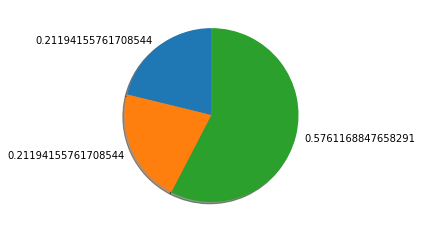

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x) :
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()

x = np.array([1.0, 1.0, 2.0])
y = softmax(x)

print(np.sum(y))

ratio = y
labels = y

# 판단 결과를 그래프로 표현, 모든 값들의 합은 1 
plt.pie(ratio, labels = labels, shadow = True, startangle = 90)
plt.show()

- 아래와 같은 경우 class 2를 결과로 내보낸다.

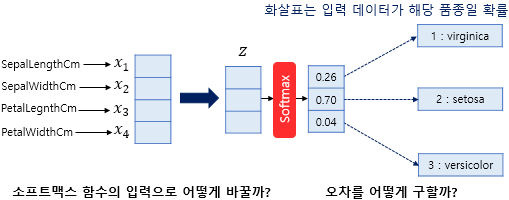

소프트맥스 출력합 : 1.0


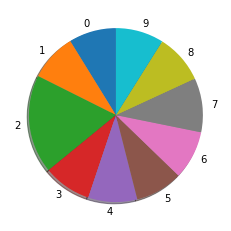

In [102]:
# 0번째 것 예측 결과 
x = tree.predict_proba(x_valid)[0]
y = softmax(x)

print(f'소프트맥스 출력합 : {np.sum(y)}')

ratio = y
labels = [0, 1, 2, 3, 4, 5, 6,7,8,9]

# 숫자 6이 제일 크다는 결과 
plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

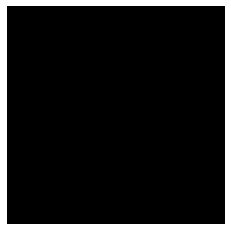

In [103]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 벡터 변환
digit_img = x_valid[0].reshape(8, 8)

plt.imshow(digit_img, cmap="gray")
plt.axis("off")
plt.show()

### Multi Classificaiton 평가 방법

#### F1-score 

In [104]:
f1_score(y_valid,pred,average="micro")

0.6688888888888889

In [105]:
f1_score(y_valid,pred,average="macro")

0.6620047429878985

In [106]:
f1_score(y_valid,pred,average="weighted")

0.6616398619763888

#### logloss
- 모델이 예측한 확률 값을 반영해서 평가한다.
- 0에 가까울 수록 좋은 모델
- 정답에 해당하는 확률값들을 음의 로그함수에 넣어서 나온값들을 평균내서 평가

In [107]:
from sklearn.metrics import log_loss

pred = tree.predict_proba(x_valid)
log_loss(y_valid, pred)

2.1156702884739955